In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
from keras.applications.nasnet import NASNetLarge

In [4]:
model = NASNetLarge(input_shape=(331,331,3))

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 96) 0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

In [6]:
layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[layer_idx].activation = activations.linear

/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


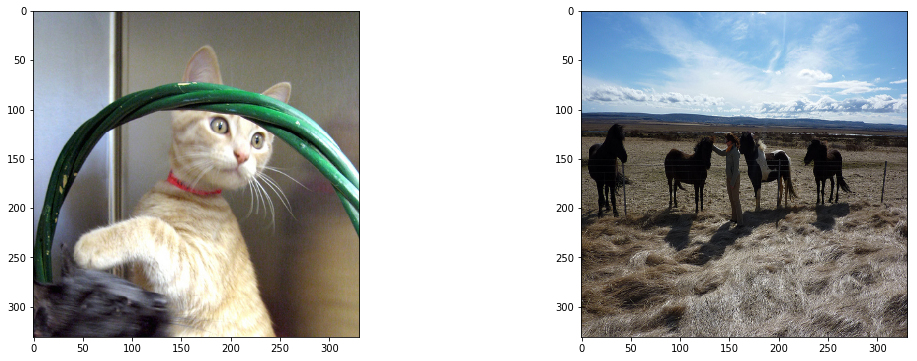

In [7]:
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('cat1.jpg', target_size=(331, 331))
img2 = utils.load_img('horse1.jpg', target_size=(331, 331))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [8]:
img1.shape

(331, 331, 3)

# NASNet

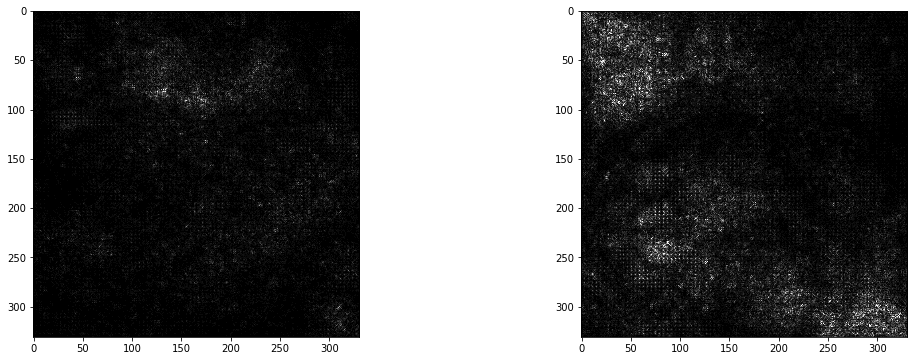

In [13]:
from vis.visualization import visualize_saliency, overlay

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img2, img1]):    
#     ind = np.argmax(model.predict(img.reshape(1, 331, 331, 3)), axis=-1)
    grads = visualize_saliency(model, layer_idx, filter_indices=281, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(np.max(grads, axis=-1), cmap='gray')

In [15]:
a = np.max(grads, axis=-1)

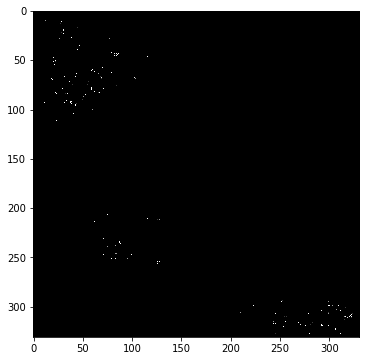

In [17]:
plt.imshow(a.clip(242,255), cmap='gray')

In [14]:
np.argmax(model.predict(img1.reshape(1, 331, 331, 3)), axis=-1)

array([394])

/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


ResourceExhaustedError: OOM when allocating tensor with shape[1,11,11,4032]
	 [[Node: normal_concat_17/concat = ConcatV2[N=6, T=DT_FLOAT, Tidx=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](adjust_bn_17/cond/Merge, normal_add_1_17/add, normal_add_2_17/add, normal_add_3_17/add, normal_add_4_17/add, normal_add_5_17/add, normal_concat_18/concat/axis)]]
	 [[Node: mul_2/_25977 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_34191_mul_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'normal_concat_17/concat', defined at:
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-497edb3879d3>", line 8, in <module>
    seed_input=img, backprop_modifier=modifier)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/vis/visualization/saliency.py", line 118, in visualize_saliency
    model = modifier_fn(model)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/vis/backprop_modifiers.py", line 17, in guided
    return backend.modify_model_backprop(model, 'guided')
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/vis/backend/tensorflow_backend.py", line 98, in modify_model_backprop
    modified_model = load_model(model_path)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/models.py", line 243, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/models.py", line 317, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/utils/generic_utils.py", line 143, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/engine/topology.py", line 2517, in from_config
    process_node(layer, node_data)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/engine/topology.py", line 2476, in process_node
    layer(input_tensors, **kwargs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/layers/merge.py", line 155, in call
    return self._merge_function(inputs)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/layers/merge.py", line 357, in _merge_function
    return K.concatenate(inputs, axis=self.axis)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 1878, in concatenate
    return tf.concat([to_dense(x) for x in tensors], axis)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1099, in concat
    return gen_array_ops._concat_v2(values=values, axis=axis, name=name)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 706, in _concat_v2
    "ConcatV2", values=values, axis=axis, name=name)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/aaditya/miniconda2/envs/tf2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,11,11,4032]
	 [[Node: normal_concat_17/concat = ConcatV2[N=6, T=DT_FLOAT, Tidx=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](adjust_bn_17/cond/Merge, normal_add_1_17/add, normal_add_2_17/add, normal_add_3_17/add, normal_add_4_17/add, normal_add_5_17/add, normal_concat_18/concat/axis)]]
	 [[Node: mul_2/_25977 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_34191_mul_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


<Figure size 1296x432 with 0 Axes>

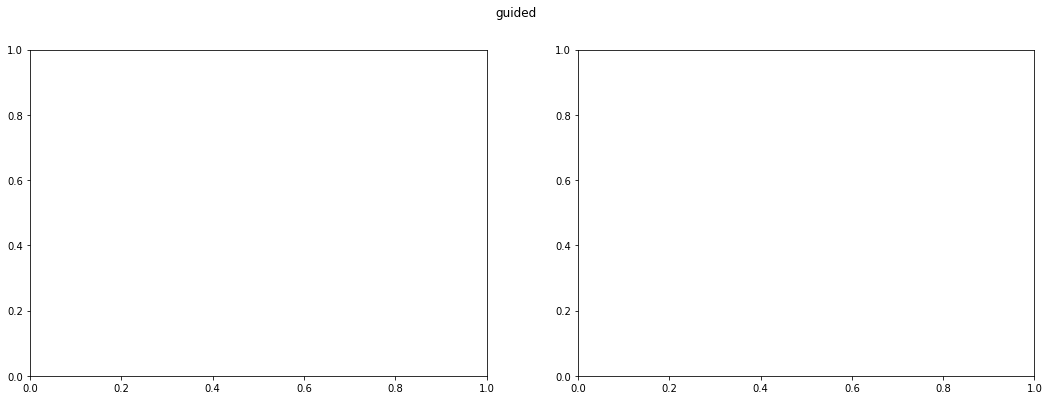

In [11]:
for modifier in ['guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=603, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.   
        # In the paper they took maximum value of gradient across channels for each pixel
        ax[i].imshow(np.max(grads, axis=-1), cmap='gray')